# Capstone Project

Health and Nutrition Data from CDC and NHANES

In [1]:
import pandas as pd #importing pandas 
#pd.set_option('display.max_rows', None) 

In [2]:
# reading the dataset from cdc
demo = pd.read_csv('/Users/harunabi/Documents/Capstone/data/demographics.csv')
diet = pd.read_csv('/Users/harunabi/Documents/Capstone/data/dietary.csv')
exam = pd.read_csv('/Users/harunabi/Documents/Capstone/data/examination.csv')
lab = pd.read_csv('/Users/harunabi/Documents/Capstone/data/laboratory.csv')
quest = pd.read_csv('/Users/harunabi/Documents/Capstone/data/questionnaire.csv')

/var/folders/w_/l5_6k0ks44j93c_h19c7c9qh0000gn/T/ipykernel_10057/3813907426.py:4: DtypeWarning: Columns (70,72) have mixed types. Specify dtype option on import or set low_memory=False.
  exam = pd.read_csv('/Users/harunabi/Documents/Capstone/data/examination.csv')
/var/folders/w_/l5_6k0ks44j93c_h19c7c9qh0000gn/T/ipykernel_10057/3813907426.py:6: DtypeWarning: Columns (758,759,776,777) have mixed types. Specify dtype option on import or set low_memory=False.
  quest = pd.read_csv('/Users/harunabi/Documents/Capstone/data/questionnaire.csv')


In [3]:
demo.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,83732.0,9.0,2.0,1.0,62.0,NaN,3.0,3.0,1.0,NaN,...,5.0,1.0,3.0,134671.370419,135629.507405,1.0,125.0,10.0,10.0,4.39
1,83733.0,9.0,2.0,1.0,53.0,NaN,3.0,3.0,1.0,NaN,...,3.0,3.0,NaN,24328.560239,25282.425927,1.0,125.0,4.0,4.0,1.32
2,83734.0,9.0,2.0,1.0,78.0,NaN,3.0,3.0,2.0,NaN,...,3.0,1.0,3.0,12400.008522,12575.838818,1.0,131.0,5.0,5.0,1.51
3,83735.0,9.0,2.0,2.0,56.0,NaN,3.0,3.0,2.0,NaN,...,5.0,6.0,NaN,102717.995647,102078.634508,1.0,131.0,10.0,10.0,5.00
4,83736.0,9.0,2.0,2.0,42.0,NaN,4.0,4.0,2.0,NaN,...,4.0,3.0,NaN,17627.674984,18234.736219,2.0,126.0,7.0,7.0,1.23


In [45]:

# demo_var = pd.read_excel("../data/demographics_variables.xlsx").iloc[:,0:2]

# diet_var = pd.read_excel("../data/dietary_variables.xlsx").iloc[:,0:2]

# exam_var = pd.read_excel("../data/examination_variables.xlsx")

# lab_var = pd.read_excel("../data/laboratory_variables.xlsx")

# quest_var = pd.read_excel("../data/questionnaire_variables.xlsx")

# Data Clean-up

We want only certain variables!

Demographic data filtering

In [5]:

#Demogrpahics data filtering

demo_clean = demo.loc[:,[
    "SEQN",                 # ID
    "RIAGENDR",             # Gender
    "RIDAGEYR",             # Age
    "RIDRETH3",             # Ethnicity
    "DMDBORN4",             # Country of Birth
    "DMDCITZN",             # US-Citizenship
    "DMDEDUC2",             # Highschool Grad?
    "DMDEDUC3",             # College Degree?
    "DMDHHSIZ",             # Household Size
    "DMDHHSZA",             # No of Kids < 6 yr in Household?
    "DMDHHSZB",             # No of Kids between 6 and 17
    "INDFMIN2",             # Total family Income
    "RIDEXPRG"              # Pregnancy status
    ]]
demo_columns = {
    "SEQN" : "ID",
    "RIAGENDR": "gender",
    "RIDAGEYR": "age",
    "RIDRETH3": "ethnicity",
    "DMDBORN4": "country_of_birth",
    "DMDCITZN": "us_citizen",
    "DMDEDUC2": "high_school_deg",
    "DMDEDUC3": "college_deg",
    "DMDHHSIZ": "household_size",
    "DMDHHSZA": "no_of_kids_u6",
    "DMDHHSZB": "no_of_kids_btw_6_17",
    "INDFMIN2": "total_income",
    "RIDEXPRG": "pregnancy_status"
    }
demo_clean.rename(columns=demo_columns, inplace = True)


Dietary data filtering

In [6]:
diet_clean = diet.loc[:,[
    'SEQN',                 # ID
    'DR1TKCAL',             # Total Calories
    'DR1TPROT',             # Total Protein
    'DR1TCARB',             # Total Carbohydrates
    'DR1TSUGR',             # Total Sugar
    'DR1_320Z',             # Total Water drank
    'DR1TTFAT',             # Total Fat
    'DR1TMFAT',             # MUFA
    'DR1TPFAT',             # PUFA
    'DR1TCHOL',             # Cholesterin
    'DR1TFIBE',             # Total Fiber
    'DR1TALCO',             # Total Alcohol
    'DR1TVARA',             # Vit A
    'DR1TVB1',              # Vit B1 (Thiamin)
    'DR1TVB2',              # Vit B2 (Riboflavin)
    'DR1TNIAC',             # Vit B3 (Niacin)
    'DR1TVB6',              # Vit B6 (Pyridoxin)
    'DR1TFA',               # Vit B9 (Folic Acid)
    'DR1TVB12',             # Vit B12 (Cobalamin)
    'DR1TVC',               # Vit C
    'DR1TVD',               # Vit D
    'DR1TATOC',             # Vit E
    'DR1TCALC',             # Calcium
    'DR1TIRON',             # Iron
    'DR1TZINC',             # Zinc
    'DR1TSODI',             # Sodium
    'DR1TPOTA',             # Potassium
    'DR1TCAFF'              # Caffeine
    ]]

diet_columns = {
    'SEQN': 'ID',
    'DR1TKCAL': 'daily_calories',
    'DR1TPROT': 'total_protein',
    'DR1TCARB': 'total_carbohydrates',
    'DR1TSUGR': 'total_sugar',
    'DR1_320Z': 'total_water',
    'DR1TTFAT': 'total_fat',
    'DR1TMFAT': 'mufa',
    'DR1TPFAT': 'pufa',
    'DR1TCHOL': 'cholesterin_diet',
    'DR1TFIBE': 'total_fiber',
    'DR1TALCO': 'total_alcohol',
    'DR1TVARA': 'vit_a',
    'DR1TVB1': 'vit_b1',
    'DR1TVB2': 'vit_b2',
    'DR1TNIAC': 'vit_b3',
    'DR1TVB6': 'vit_b6',
    'DR1TFA': 'vit_b9',
    'DR1TVB12': 'vit_b12',
    'DR1TVC': 'vit_c',
    'DR1TVD': 'vit_d_diet',
    'DR1TATOC': 'vit_e',
    'DR1TCALC': 'calcium',
    'DR1TIRON': 'iron',
    'DR1TZINC': 'zinc',
    'DR1TSODI': 'sodium',
    'DR1TPOTA': 'potassium',
    'DR1TCAFF': 'caffeine'
}

diet_clean.rename(columns=diet_columns, inplace = True)


Examination data filter

In [7]:
exam_clean = exam.loc[:,[
    'SEQN',                 # ID
    'BMXWT',                # Weight
    'BMXHT',                # Height
    'BMXBMI',               # BMI
    'BMXWAIST',             # Waist circumference
    'BPXSY1',               # Systolic BP
    'BPXDI1',               # Diastolic BP
    'BPXPULS'               # Pulse
    ]]

exam_columns = {
    'SEQN': 'ID',
    'BMXWT': 'weight',
    'BMXHT': 'height',
    'BMXBMI': 'bmi',
    'BMXWAIST': 'waist_circumference',
    'BPXSY1': 'systolic_bp',
    'BPXDI1': 'diastolic_bp',
    'BPXPULS': 'pulse'
}

exam_clean.rename(columns=exam_columns, inplace = True)


Laboratory data filtering

In [8]:
lab_clean = lab.loc[:,[
    'SEQN',             # ID
    'LBXGLU',           # Glucose in Blood mg/dL
    'LBDINSI',          # Insulin pmol/L
    'LBXTC',            # Cholesterol mg/dL
    'LBXTR',            # Triglyceride mg/dL
    'LBDLDL',           # LDL-cholesterol mg/dL
#   'LBXSAL',           # Albumin
#   'LBXSATSI',         # Alanine Aminotransferase ALT U/L
    'LBXSGTSI',         # Gamma glutamyl transferase
    'LBXSAPSI',         # Alkaline phosphatase (IU/L)
    'LBXVIDMS',         # vitamin D2 + D3
    'URXUCR',           # Urinary creatinine (mg/dL)
    'URXUMA',           # Albumin, urine (ug/mL)
    'URDACT'            # Albumin creatinine ratio (mg/g)
]]

lab_columns = {
    'SEQN': 'ID',
    'LBXGLU': 'blood_glucose',
    'LBDINSI': 'insulin',
    'LBXTC': 'cholesterin_lab',
    'LBXTR': 'triaclyglycerole',
    'LBDLDL': 'ldl',
#   'LBXSAL': 'albumin',
#   'LBXSATSI': 'ALT',
    'LBXSGTSI': 'gamma_glutamyl_transferase',
    'LBXSAPSI': 'alkaline_phosphatase',
    'LBXVIDMS': 'vit_d_lab',
    'URXUCR': 'urinary_creatinine',
    'URXUMA': 'albumine',
    'URDACT': 'albumine_creatinine_ratio'
}

lab_clean.rename(columns=lab_columns, inplace = True)

Questionaire data fltering

In [9]:
quest_clean = quest.loc[:,[
    'SEQN',                 # ID
    'PAQ620',               # Work with physical activity?
    'PAD680',               # Time spent sitting
    'PAD675',               # Time spent doing physical activities / day
    'PAQ640',               # Days on which you bike or walk more than 10 mins/week
    'MCQ010',               # Asthma?
    'MCQ080',               # Has a Doctor ever said: "you are overweight!" ?
    'MCQ220',               # Has a Doctor ever said: "You have cancer" ?
    'SMQ040',               # Do you smoke?
    'ALQ130',               # On avg how many drinks on days you drank alcohol?
    'SLQ050',               # Ever told a doctor: Trouble sleeping?
    'DIQ010'                # Has a Doctor ever told you: "You have Diabetes"?
    ]]


quest_columns = {
    'SEQN': 'ID',
    'PAQ620': 'physical_activity_work',
    'PAD680': 'sitting_per_day',
    'ALQ130': 'alcoholic_drinks',
    'SMQ040': 'smoker',
    'PAD675': 'sport_days',
    'PAQ640': 'walk_<10_minutes_p_day',
    'MCQ010': 'asthma',
    'MCQ080': 'overweight',
    'MCQ220': 'cancer',
    'SLQ050': 'trouble_sleeping',
    'DIQ010': 'diabetes'
}
quest_clean.rename(columns=quest_columns, inplace = True)

Checking for Duplicates

In [47]:
print(demo_clean.shape)
print(demo_clean.duplicated().value_counts())

(9971, 13)
False    9971
Name: count, dtype: int64


In [48]:
print(exam_clean.shape)
print(exam_clean.duplicated().value_counts())

(9544, 8)
False    9544
Name: count, dtype: int64


In [49]:
print(quest_clean.shape)
print(quest_clean.duplicated().value_counts())

(9971, 12)
False    9971
Name: count, dtype: int64


In [ ]:
print(diet_clean.shape)
print(diet_clean.duplicated().value_counts())

In [50]:
print(lab_clean.shape)
print(lab_clean.duplicated().value_counts())

(9544, 12)
False    9544
Name: count, dtype: int64


Merging all dataframes

In [51]:

data_merged = demo_clean.merge(diet_clean, how = 'inner', on="ID").merge(exam_clean, how='inner', on='ID').merge(lab_clean, how='inner', on='ID').merge(quest_clean, how='inner', on='ID')

In [52]:
data_merged

,ID,gender,age,ethnicity,country_of_birth,us_citizen,high_school_deg,college_deg,household_size,no_of_kids_u6,...,sitting_per_day,sport_days,walk_<10_minutes_p_day,asthma,overweight,cancer,smoker,alcoholic_drinks,trouble_sleeping,diabetes
0,83732.0,1.0,62.0,3.0,1.0,1.0,5.0,NaN,2.0,0.0,...,480.0,30.0,NaN,2.0,1.0,1.0,3.0,1.0,1.0,1.0
1,83733.0,1.0,53.0,3.0,2.0,2.0,3.0,NaN,1.0,0.0,...,300.0,NaN,NaN,2.0,2.0,2.0,1.0,6.0,2.0,2.0
2,83734.0,1.0,78.0,3.0,1.0,1.0,3.0,NaN,2.0,0.0,...,480.0,NaN,NaN,1.0,1.0,1.0,3.0,NaN,2.0,1.0
3,83735.0,2.0,56.0,3.0,1.0,1.0,5.0,NaN,1.0,0.0,...,480.0,NaN,NaN,2.0,1.0,2.0,NaN,1.0,1.0,2.0
4,83736.0,2.0,42.0,4.0,1.0,1.0,4.0,NaN,5.0,0.0,...,540.0,NaN,NaN,1.0,2.0,2.0,NaN,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,93698.0,1.0,2.0,1.0,1.0,1.0,NaN,NaN,7.0,3.0,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0
9540,93699.0,2.0,6.0,4.0,1.0,1.0,NaN,0.0,5.0,0.0,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0
9541,93700.0,1.0,35.0,3.0,2.0,2.0,1.0,NaN,5.0,0.0,...,600.0,NaN,NaN,2.0,9.0,2.0,1.0,NaN,1.0,2.0
9542,93701.0,1.0,8.0,3.0,1.0,1.0,NaN,2.0,4.0,0.0,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0


# De-encode Result-values

In [38]:
missing = data_merged.isnull().sum().sort_values(ascending=False)
print(missing[missing > 0])

walk_<10_minutes_p_day        7823
college_deg                   6998
ldl                           6845
triaclyglycerole              6821
sport_days                    6695
insulin                       6623
blood_glucose                 6572
alcoholic_drinks              6165
alkaline_phosphatase          3289
gamma_glutamyl_transferase    3288
sitting_per_day               2857
systolic_bp                   2399
diastolic_bp                  2399
cholesterin_lab               2288
vit_d_lab                     1505
albumine                      1264
urinary_creatinine            1264
albumine_creatinine_ratio     1264
waist_circumference           1231
vit_b9                        1217
caffeine                      1217
potassium                     1217
sodium                        1217
zinc                          1217
iron                          1217
vit_e                         1217
vit_d_diet                    1217
vit_c                         1217
vit_b12             

In [32]:
int_list = [
    "ID", "age", "no_of_kids_u6", "household_size",
    "no_of_kids_btw_6_17",
    "sport_days", "sitting_per_day",
    "walk_<10_minutes_p_day", "alcoholic_drinks"
]

data_merged.loc[:,int_list] = data_merged.loc[:,int_list].astype('Int64')

In [ ]:
# 777, 7777, 999 & 9999 are unknown or refused to say. for simplicity purposes we set all of these to 0
data_merged.replace([777, 999, 7777, 9999], 0, inplace=True)

In [14]:
str_list = [
       'gender',
       'country_of_birth',
       'us_citizen',
       'ethnicity',
       'high_school_deg',
       'pregnancy_status',
       'physical_activity_work',
       'asthma',
       'overweight',
       'cancer',
       'smoker',
       'trouble_sleeping',
       'diabetes']

data_merged[str_list] = data_merged[str_list].astype('str')

In [40]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9544 entries, 0 to 9543
Data columns (total 69 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          9544 non-null   float64
 1   gender                      9544 non-null   object 
 2   age                         9544 non-null   float64
 3   ethnicity                   9544 non-null   object 
 4   country_of_birth            9544 non-null   object 
 5   us_citizen                  9544 non-null   object 
 6   high_school_deg             9544 non-null   object 
 7   college_deg                 2546 non-null   float64
 8   household_size              9544 non-null   float64
 9   no_of_kids_u6               9544 non-null   float64
 10  no_of_kids_btw_6_17         9544 non-null   float64
 11  total_income                9277 non-null   float64
 12  pregnancy_status            9544 non-null   object 
 13  daily_calories              8327 

In [ ]:
# country of birth:
# 1: born in usa
# 2: others
# 77 refused
# 99 dont know
# . missing

data_merged['country_of_birth'] = data_merged['country_of_birth'].map({
    '1.0': 'USA',
    '2.0': 'others'
}).fillna('unknown')

data_merged['country_of_birth']

0          USA
1       others
2          USA
3          USA
4          USA
         ...  
9539       USA
9540       USA
9541    others
9542       USA
9543       USA
Name: country_of_birth, Length: 9544, dtype: object

In [16]:
# citizen:\
# 1 born in the usa\
# 2 durch einbürgerung\
# 7 kein us-bürger\
# 9 keine angabe

data_merged['us_citizen'] = data_merged['us_citizen'].map({
    '1.0': 'US-citizen',
    '2.0': 'US-citizen',
    '7.0': 'not a citizen',
    '9.0': 'unknown'
}).fillna('unknown')
data_merged['us_citizen'].value_counts()

us_citizen
US-citizen       9527
unknown             9
not a citizen       8
Name: count, dtype: int64

In [17]:
# pregnancy status:\
# 1: yes\
# 2: not pregnant at exam\
# 3: unsure

data_merged['pregnancy_status'] = data_merged['pregnancy_status'].map({
    '1.0': 'pregnant',
    '2.0': 'not pregnant',
    '3.0': 'unknown'
}).fillna('unknown')
data_merged['pregnancy_status'].value_counts()


pregnancy_status
unknown         8349
not pregnant    1125
pregnant          70
Name: count, dtype: int64

In [18]:
# physical activity at work\
# 1 yes\
# 2 no\
# 7 refused\
# 9 dont know\
# . missing

data_merged['physical_activity_work'] = data_merged['physical_activity_work'].map({
    '1.0': 'yes',
    '2.0': 'no',
    '9.0': 'unknown',
    '7.0': 'unknown'
}).fillna('unknown')
data_merged['physical_activity_work'].value_counts()

physical_activity_work
no         4186
unknown    2847
yes        2511
Name: count, dtype: int64

In [19]:
# SMQ040 - smoker
# 1 every day
# 2 some days
# 3 not at all
# 7 refused
# 9 dont know
# . missing

data_merged['smoker'] = data_merged['smoker'].map({
    '1.0': 'every day',
    '2.0': 'some days',
    '3.0': 'not at all',
    '9.0': 'unknown',
    '7.0': 'unknown'
}).fillna('unknown')

data_merged['smoker'].value_counts()

smoker
unknown       7225
not at all    1264
every day      798
some days      257
Name: count, dtype: int64

In [20]:
# MCQ080 - overweight
# 1 - yes
# 2- no
# 3- refused
# 9 dont know
# . missing
data_merged['overweight'] = data_merged['overweight'].map({
    '1.0': 'yes',
    '2.0': 'no',
    '3.0': 'refused',
    '9.0': 'unknown'
}).fillna('unknown')

data_merged['overweight'].value_counts()

overweight
no         3915
unknown    3485
yes        2144
Name: count, dtype: int64

In [21]:
# MCQ220 - cancer
# 1 - yes
# 2- no
# 3- refused
# 9 dont know
# . missing

data_merged['cancer'] = data_merged['cancer'].map({
    '1.0': 'yes',
    '2.0': 'no',
    '3.0': 'refused',
    '9.0': 'unknown'
}).fillna('unknown')

data_merged['cancer'].value_counts()

cancer
no         4945
unknown    4074
yes         525
Name: count, dtype: int64

In [22]:
# MCQ010 asthma
# 1 - yes
# 2- no
# 3- refused
# 9 dont know
# . missing

data_merged['asthma'] = data_merged['asthma'].map({
    '1.0': 'yes',
    '2.0': 'no',
    '3.0': 'refused',
    '9.0': 'unknown'
}).fillna('unknown')

data_merged['asthma'].value_counts()

asthma
no         7778
yes        1376
unknown     390
Name: count, dtype: int64

In [23]:
# DIQ010 - diabetes
# 1 yes
# 2 no
# 3 borderline
# 7 ref
# 9 dont know
# . missing

data_merged['diabetes'] = data_merged['diabetes'].map({
    '1.0': 'yes',
    '2.0': 'no',
    '3.0': 'refused',
    '9.0': 'unknown'
}).fillna('unknown')

data_merged['diabetes'].value_counts()

diabetes
no         8200
yes         820
unknown     383
refused     141
Name: count, dtype: int64

In [24]:
# ethnicity
# 1.0 mexican american
# 2.0 other hispanic
# 3.0 non-hispanic white
# 4.0 non-hispanic black
# 6.0 asian
# 7.0 others 

data_merged['ethnicity'] = data_merged['ethnicity'].map({
    '1.0': 'mexican american',
    '2.0': 'hispanic',
    '3.0': 'white',
    '4.0': 'black',
    '6.0': 'asian',
    '7.0': 'others'
}).fillna('unknown')
data_merged['ethnicity'].value_counts()

ethnicity
white               2948
black               2052
mexican american    1837
hispanic            1232
asian                986
others               489
Name: count, dtype: int64

In [ ]:
data_merged

# Ploting 

<Axes: xlabel='us_citizen', ylabel='weight'>

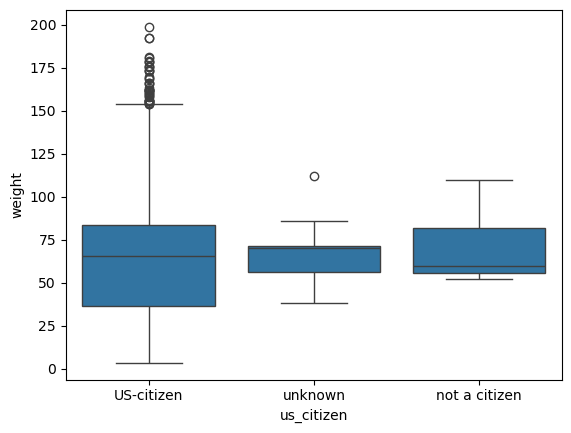

In [42]:
import seaborn as sns

sns.boxplot(data= data_merged, x = 'us_citizen', y='weight')

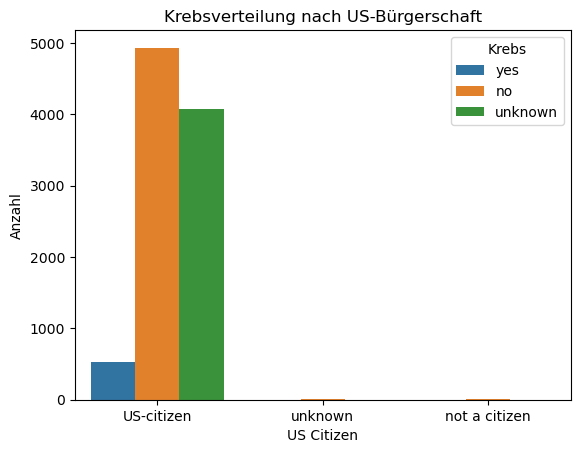

In [44]:

# Gruppiertes Balkendiagramm
sns.countplot(data=data_merged, x='us_citizen', hue='cancer')
plt.title('Krebsverteilung nach US-Bürgerschaft')
plt.xlabel('US Citizen')
plt.ylabel('Anzahl')
plt.legend(title='Krebs')
plt.show()

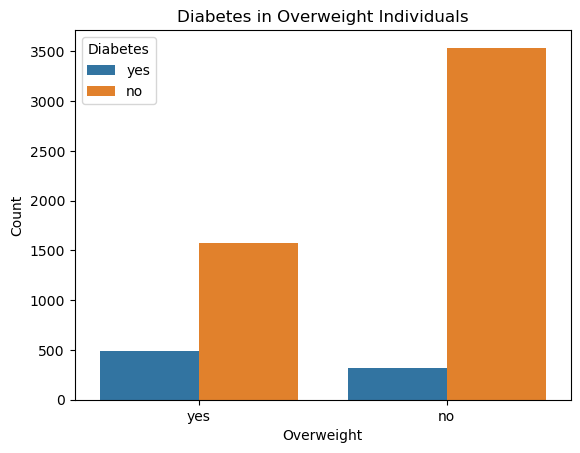

In [43]:

import matplotlib.pyplot as plt

data_diabetes = data_merged.loc[:,['diabetes', 'weight', 'overweight', 'age']]

data_diabetes = data_diabetes[((data_diabetes['diabetes'] == 'yes') | (data_diabetes['diabetes'] == 'no')) & (data_diabetes['overweight'] != 'unknown')]

# sns.countplot(data_diabetes, x= 'overweight', y='diabetes')

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data_diabetes, x='overweight', hue='diabetes')
plt.title('Diabetes in Overweight Individuals')
plt.xlabel('Overweight')
plt.ylabel('Count')
plt.legend(title='Diabetes')
plt.show()

In [54]:
data_merged.isnull().sum()

ID                     0
gender                 0
age                    0
ethnicity              0
country_of_birth       0
                    ... 
cancer              4070
smoker              7225
alcoholic_drinks    6165
trouble_sleeping    3481
diabetes             379
Length: 69, dtype: int64